In [6]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import scipy as scipy
import seaborn as sns

# Exercise

In this notebook you should train a machine learning model and do hyperparameter tuning using at least 2 of the three validation methodologies we have considered. You can see how they can each be implemented in the "Validation and cross validation"-notebook. 

Below the Boston data set (which we also considered in lecture 1) is loaded. However, feel free to replace this by any other dataset of your choice (for example the Titanic dataset, the movie reviews dataset, or your own dataset if you have one!).

Try to include more than one hyperparameter in the GridSearchCV. You are also welcome to replace the algorithm - you could e.g. try a decision tree (import sklearn.tree.DecisionTreeClassifier).

In [2]:
import pandas as pd

# Path to your Excel file
file_path = "Boston Housing.xlsx"

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT.MEDV  
0   4.98  24.0         0  
1   9.14  21.6         0  
2   4.03  34.7         1  
3   2.94  33.4         1  
4   5.33  36.2         1  


In [4]:
features = data.drop(columns=['MEDV', 'CAT.MEDV'])
target = data['CAT.MEDV']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=69)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:379
Size of test set:127


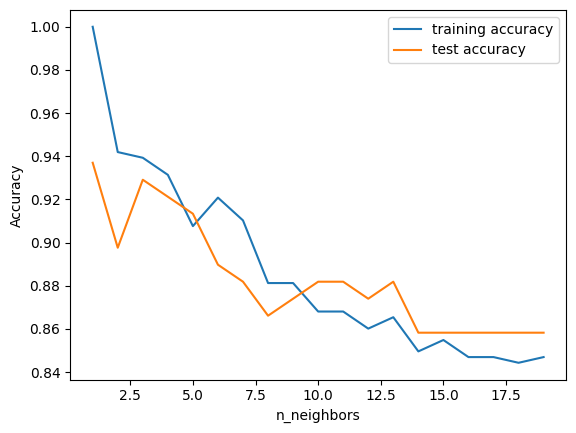

In [14]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();